In [1]:
import pandas as pd

X_features = pd.read_csv("data/X_features.csv")
consumption = pd.read_excel("data/20251111_JUNCTION_training.xlsx", sheet_name="training_consumption")

/tmp/ipykernel_16780/3545192488.py:3: DtypeWarning: Columns (11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,31,32,141,142,143,144) have mixed types. Specify dtype option on import or set low_memory=False.
  X_features = pd.read_csv("data/X_features.csv")


In [ ]:
X = X_features.loc[24:].drop("measured_at", axis=1)
y = consumption.loc[24:].drop("measured_at", axis=1)

# data cleaning
string_cols = X.select_dtypes(include=['object']).columns
for col in string_cols:
    X[col] = pd.to_numeric(X[col], errors="coerce")

X[string_cols] = X[string_cols].fillna(0.0)


from sklearn.tree import DecisionTreeRegressor

# temporal split
test_size = 0.3
n_samples = len(X)
split = int(n_samples * (1 - test_size))
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

X_train = X[:split]
y_train = y[:split]

X_test = X[split:]
y_test = y[split:]

dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)


## Visualizing the testing error per region

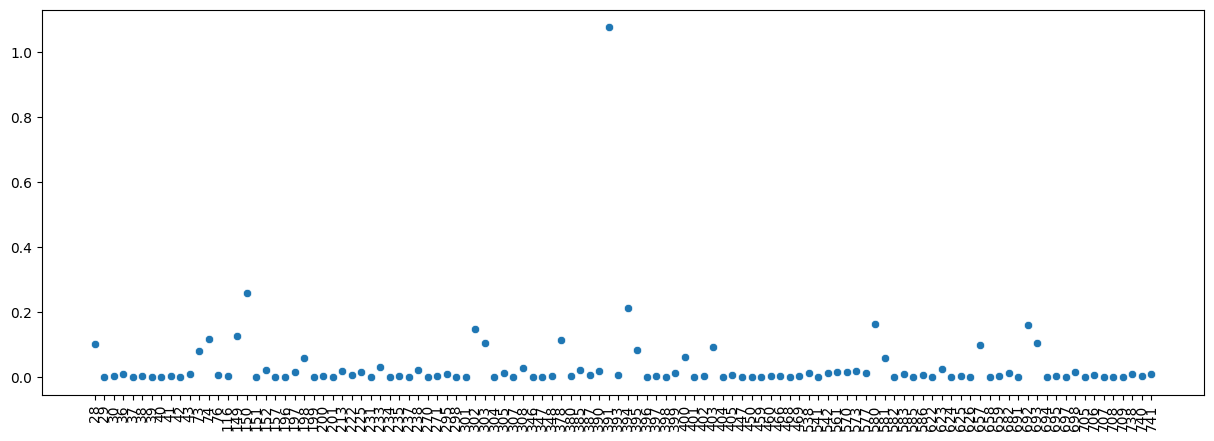

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt

iss = []
mses = []

for idx, i in enumerate(y_test):
    mae = mean_absolute_error(y_test[29], dtr.predict(X_test)[:, 1])
    iss.append(str(i))

plt.figure(figsize=(15,5))
sns.scatterplot(x=iss, y=mses)
_ = plt.xticks(rotation=90)

## Monthly Model

In [41]:
import pandas as pd
import numpy as np

X_features = pd.read_csv("data/X_features.csv")
consumption = pd.read_excel("data/20251111_JUNCTION_training.xlsx", sheet_name="training_consumption")

/tmp/ipykernel_16780/1189175772.py:4: DtypeWarning: Columns (11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,31,32,141,142,143,144) have mixed types. Specify dtype option on import or set low_memory=False.
  X_features = pd.read_csv("data/X_features.csv")


In [62]:
consumption["measured_at"] = pd.to_datetime(consumption["measured_at"])
ym = consumption.copy()
ym["year"] = ym["measured_at"].dt.year
ym["month"] = ym["measured_at"].dt.month
ym = ym.drop("measured_at", axis=1)
ym = ym.groupby(["year", "month"]).sum().reset_index()

In [76]:
Xm = pd.read_csv("data/df_month_predict.csv")
Xm = Xm.drop(["Unnamed: 0", "measured_at"], axis=1)

In [80]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut

loo = LeaveOneOut()

model = DecisionTreeRegressor()
scores = cross_val_score(model, Xm, ym, cv=loo, scoring="neg_mean_absolute_error")

scores.mean()

np.float64(-92.34531618053907)

In [81]:
import joblib
model.fit(Xm, ym)
joblib.dump(model, "monthly.joblib")

['monthly.joblib']